In [2]:
price_str = '30.14, 29.58, 26.36, 32.56, 32.82'
type(price_str)

str

In [4]:
if not isinstance(price_str,str):
    price_str = str(price_str)
if isinstance(price_str,int) and price_str > 0:
    price_str += 1
elif isinstance(price_str,float) and price_str < 0:
    price_str += 1.0
else:
    raise TypeError('price_str is str type!')

TypeError: price_str is str type!

### 字符串

In [5]:
print('旧的price_str id= {}'.format(id(price_str)))
price_str = price_str.replace(' ','')
print('新的price_str id= {}'.format(id(price_str)))
price_str

旧的price_str id= 140136290753392
新的price_str id= 140136292170688


'30.14,29.58,26.36,32.56,32.82'

### 容器

In [6]:
price_array = price_str.split(',')
print(price_array)

['30.14', '29.58', '26.36', '32.56', '32.82']


In [7]:
price_array.append('32.82')
print(price_array)

['30.14', '29.58', '26.36', '32.56', '32.82', '32.82']


In [8]:
set(price_array)

{'26.36', '29.58', '30.14', '32.56', '32.82'}

In [10]:
price_array.remove('32.82')
price_array

['30.14', '29.58', '26.36', '32.56']

### 循环控制

In [13]:
date_array = []
date_base = 20170118

for _ in range(0,len(price_array)):
    date_array.append(str(date_base))
    date_base += 1
date_array

['20170118', '20170119', '20170120', '20170121']

In [14]:
date_array = []
date_base = 20170118
price_cnt = len(price_array) - 1

while price_cnt > 0:
    date_array.append(str(date_base))
    date_base += 1
    price_cnt -= 1
date_array

['20170118', '20170119', '20170120']

### 列表推导式

In [15]:
date_base = 20170118
date_array = [str(date_base + ind) for ind, _ in enumerate(price_array)]
date_array

['20170118', '20170119', '20170120', '20170121']

In [16]:
stock_tuple_list = [(date,price) for date,price in zip(date_array,price_array)]
print('20170119日价格： {}'.format(stock_tuple_list[1][1]))

20170119日价格： 29.58


In [17]:
stock_tuple_list

[('20170118', '30.14'),
 ('20170119', '29.58'),
 ('20170120', '26.36'),
 ('20170121', '32.56')]

### 可命名元组 namedtuple

In [18]:
from collections import namedtuple

stock_namedtuple = namedtuple('stock', ('date','price'))
stock_namedtuple_list = [stock_namedtuple(date,price) for date,price in zip(date_array,price_array)]
print('20170119日价格: {}'.format(stock_namedtuple_list[1].price))
stock_namedtuple_list

20170119日价格: 29.58


[stock(date='20170118', price='30.14'),
 stock(date='20170119', price='29.58'),
 stock(date='20170120', price='26.36'),
 stock(date='20170121', price='32.56')]

### 字典推导式

In [19]:
stock_dict = {date:price for date,price in zip(date_array,price_array)}
print('20170119日价格: {}'.format(stock_dict['20170119']))
stock_dict

20170119日价格: 29.58


{'20170118': '30.14',
 '20170119': '29.58',
 '20170120': '26.36',
 '20170121': '32.56'}

### 有序字典

In [21]:
from collections import OrderedDict

stock_dict = OrderedDict(
    (date,price) for date,price in zip(date_array,price_array)
)

stock_dict.keys()

odict_keys(['20170118', '20170119', '20170120', '20170121'])

### 函数

In [22]:
min(stock_dict)

'20170118'

In [23]:
min(zip(stock_dict.values(),stock_dict.keys()))

('26.36', '20170120')

In [25]:
list(zip(stock_dict.values(),stock_dict.keys()))

[('30.14', '20170118'),
 ('29.58', '20170119'),
 ('26.36', '20170120'),
 ('32.56', '20170121')]

In [26]:
def find_second_max(dict_array):
    stock_prices_sorted = sorted(
        zip(dict_array.values(),dict_array.keys())
    )
    return stock_prices_sorted[-2]

# callable()验证是否为一个可调用call的函数
if callable(find_second_max):
    print(find_second_max(stock_dict))

('30.14', '20170118')


In [27]:
find_second_max_lambda = lambda dict_array: sorted(zip(dict_array.values(),dict_array.keys()))[-2]

find_second_max_lambda(stock_dict)

('30.14', '20170118')

In [28]:
# 求最大值和最小值
def find_max_and_min(dict_array):
    stock_prices_sorted = sorted(
        zip(dict_array.values(),dict_array.keys())
    )
    return stock_prices_sorted[0],stock_prices_sorted[-1]

find_max_and_min(stock_dict)

(('26.36', '20170120'), ('32.56', '20170121'))

In [29]:
# 从收盘价格，推导出每天的张跌幅度
price_float_array = [float(price_str) for price_str in stock_dict.values()]
pp_array = [(price1,price2) for price1,price2 in zip(price_float_array[:-1],price_float_array[1:])]
pp_array

[(30.14, 29.58), (29.58, 26.36), (26.36, 32.56)]

In [32]:
from functools import reduce
change_array = map(
    lambda pp: reduce(lambda a,b: round((b-a)/a,3),pp),
    pp_array
)

change_array_list = list(change_array)
change_array_list.insert(0,0)
change_array_list

[0, -0.019, -0.109, 0.235]

In [36]:
# 申明了一个tuple
stock_namedtuple = namedtuple('stock',('date','price','change'))

stock_dict = OrderedDict(
    (date,stock_namedtuple(date,price,change)) 
    for date,price,change in zip(date_array,price_array,change_array_list)
)

stock_dict

OrderedDict([('20170118', stock(date='20170118', price='30.14', change=0)),
             ('20170119',
              stock(date='20170119', price='29.58', change=-0.019)),
             ('20170120',
              stock(date='20170120', price='26.36', change=-0.109)),
             ('20170121',
              stock(date='20170121', price='32.56', change=0.235))])

In [37]:
def filter_stock(stock_array_dict,want_up=True,want_calc_sum=False):
    if not isinstance(stock_array_dict,OrderedDict):
        raise TypeError('stock_array_dict must be OrderedDict!')
    
    filter_func = (lambda day: day.change > 0) if want_up else (lambda day:day.change < 0)
    
    want_days = filter(filter_func, stock_array_dict.values())
    
    if not want_calc_sum:
        return want_days
    
    change_sum = 0.0
    for day in want_days:
        change_sum += day.change
    return change_sum

In [42]:
print('所有上涨的交易日： {}'.format(list(filter_stock(stock_dict))))
print('所有下跌的交易日： {}'.format(list(filter_stock(stock_dict,want_up=False))))
print('所有上涨交易日的涨幅和: {}'.format(float(filter_stock(stock_dict,want_calc_sum=True))))
print('所有下跌交易日的跌幅和：{}'.format(float(filter_stock(stock_dict,want_calc_sum=True,want_up=False))))

所有上涨的交易日： [stock(date='20170121', price='32.56', change=0.235)]
所有下跌的交易日： [stock(date='20170119', price='29.58', change=-0.019), stock(date='20170120', price='26.36', change=-0.109)]
所有上涨交易日的涨幅和: 0.235
所有下跌交易日的跌幅和：-0.128


In [43]:
from functools import partial

filter_stock_up_days = partial(filter_stock,want_up=True,want_calc_sum=False)
filter_stock_down_days = partial(filter_stock,want_up=False,want_calc_sum=False)
filter_stock_up_sums = partial(filter_stock,want_up=True,want_calc_sum=True)
filter_stock_down_sums = partial(filter_stock,want_up=False,want_calc_sum=True)

filter_stock_up_days
filter_stock_down_days
filter_stock_up_sums
filter_stock_down_sums

functools.partial(<function filter_stock at 0x7f74040fea60>, want_up=False, want_calc_sum=True)

In [45]:
print('所有上涨的交易日: {}'.format(list(filter_stock_up_days(stock_dict))))
print('所有下跌的交易日：{}'.format(list(filter_stock_down_days(stock_dict))))
print('所有上涨交易日的涨幅和：{}'.format(filter_stock_up_sums(stock_dict)))
print('所有下跌交易日的跌幅和：{}'.format(filter_stock_down_sums(stock_dict)))

所有上涨的交易日: [stock(date='20170121', price='32.56', change=0.235)]
所有下跌的交易日：[stock(date='20170119', price='29.58', change=-0.019), stock(date='20170120', price='26.36', change=-0.109)]
所有上涨交易日的涨幅和：0.235
所有下跌交易日的跌幅和：-0.128


### 面向对象

In [49]:
from collections import namedtuple
from collections import OrderedDict

class StockTradeDays(object):
    
    def __init__(self,price_array,start_date,date_array=None):
        # 私有价格序列
        self.__price_array = price_array
        # 私有日期序列
        self.__date_array = self._init_days(start_date, date_array)
        # 私有涨跌副序列
        self.__change_array = self.__init_change()
        # 进行OrderedDict的组装
        self.stock_dict = self._init_stock_dict()
    
    def __init_change(self):
        # 从price_array 生成chang_array
        price_float_array = [float(price_str) for price_str in self.__price_array]
        
        pp_array = [(price1,price2) for price1,price2 in zip(price_float_array[:-1],price_float_array[1:])]
        
        change_array = map(
            lambda pp: reduce(lambda a,b:round((b-a)/a,3),pp),
            pp_array
        )
        
        change_array_list = list(change_array)
        change_array_list.insert(0,0)
        return change_array_list
    
    def _init_days(self,start_date,date_array):
        
        if date_array is None:
            date_array = [str(start_date+ind) for ind,_ in enumerate(self.__price_array)]
        else:
            date_array = [str(date) for date in date_array]
        return date_array
    
    def _init_stock_dict(self):
        stock_namedtuple = namedtuple('stock',('date','price','change'))
        
        stock_dict = OrderedDict(
            (date,stock_namedtuple(date,price,change) )
             for date,price,change in zip(self.__date_array,self.__price_array,self.__change_array)
        )
        return stock_dict
    
    def filter_stock(self,want_up=True,want_calc_sum=False):
        filter_func = (lambda day:day.change > 0) if want_up else (lambda day:day.change < 0)
        want_days = filter(filter_func,self.stock_dict.values())
        
        if not want_calc_sum:
            return want_days
        
        change_sum = 0.0
        for day in want_days:
            change_sum += day.change
        return change_sum
    
    def __str__(self):
        return str(self.stock_dict)
    
    def __iter__(self):
        for key in self.stock_dict:
            yield self.stock_dict[key]
            
    def __getitem__(self,ind):
        date_key = self.__date_array[ind]
        return self.stock_dict[date_key]
    
    def __len__(self):
        return len(self.stock_dict)

In [51]:
price_array = '30.14,29.58,26.36,32.56,32.82'.split(',')
date_base = 20170118
trade_days = StockTradeDays(price_array,date_base)
list(trade_days)

[stock(date='20170118', price='30.14', change=0),
 stock(date='20170119', price='29.58', change=-0.019),
 stock(date='20170120', price='26.36', change=-0.109),
 stock(date='20170121', price='32.56', change=0.235),
 stock(date='20170122', price='32.82', change=0.008)]

In [52]:
from collections import Iterable

if isinstance(trade_days, Iterable):
    for day in trade_days:
        print(day)

stock(date='20170118', price='30.14', change=0)
stock(date='20170119', price='29.58', change=-0.019)
stock(date='20170120', price='26.36', change=-0.109)
stock(date='20170121', price='32.56', change=0.235)
stock(date='20170122', price='32.82', change=0.008)


<ipython-input-52-63dbc2a1003c>:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Iterable


In [53]:
trade_days.filter_stock()

In [54]:
if isinstance(trade_days.filter_stock(),Iterable):
    for price in trade_days.filter_stock():
        print(price)

stock(date='20170121', price='32.56', change=0.235)
stock(date='20170122', price='32.82', change=0.008)


In [55]:
!pip3 install six

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


### 编写基类

In [57]:
import six
from abc import ABCMeta,abstractmethod

class TradeStrategyBase(six.with_metaclass(ABCMeta,object)):
    '''
    交易策略抽象基类
    '''
    @abstractmethod
    def buy_strategy(self,*args,**kwargs):
        '''
        买入策略基类
        '''
        pass
    
    @abstractmethod
    def sell_strategy(self,*args,**kwargs):
        '''
        卖出策略基类
        '''
        pass

In [60]:
class TradeStrategy1(TradeStrategyBase):
    '''
    交易策略1： 追涨策略，当股价上涨一个阀值，默认为7%时，买入股票并持有，s_keep_stock_threshold(20)天
    '''
    
    s_keep_stock_threshold = 20
    
    def __init__(self):
        self.keep_stock_day = 0
        self.__buy_change_threshold = 0.07
        
    def buy_strategy(self,trade_ind,trade_day,trade_days):
        if self.keep_stock_day == 0 and trade_day.change > self.__buy_change_threshold:
            self.keep_stock_day += 1
        elif self.keep_stock_day > 0:
            self.keep_stock_day += 1
    
    def sell_strategy(self,trade_ind,trade_day,trade_days):
        if self.keep_stock_day >= TradeStrategy1.s_keep_stock_threshold:
            self.keep_stock_day = 0
            
            
    @property
    def buy_change_threshold(self):
        return self.__buy_change_threshold
    @buy_change_threshold.setter
    def buy_change_threshold(self,buy_change_threshold):
        if not isinstance(buy_change_threshold,float):
            raise TypeError('buy_change_threshold must be float!')
        self.__buy_change_threshold = round(buy_change_threshold,2)

In [61]:
class TradeLoopBack(object):
    
    def __init__(self, trade_days, trade_strategy):
        self.trade_days = trade_days
        self.trade_strategy = trade_strategy
        self.profit_array = []
        
    def execute_trade(self):
        for ind,day in enumerate(self.trade_days):
            if self.trade_strategy.keep_stock_day > 0:
                self.profit_array.append(day.change)
            if hasattr(self.trade_strategy,'buy_strategy'):
                self.trade_strategy.buy_strategy(ind,day,self.trade_days)
            if hasattr(self.trade_strategy,'sell_strategy'):
                self.trade_strategy.sell_strategy(ind,day,self.trade_days)

In [63]:
trade_loop_back = TradeLoopBack(trade_days,TradeStrategy1())
trade_loop_back.execute_trade()
print(
    '回测策略1 总盈亏为： {}%'.format(
    reduce(lambda a,b: a+b,trade_loop_back.profit_array)*100)
     )

回测策略1 总盈亏为： 0.8%


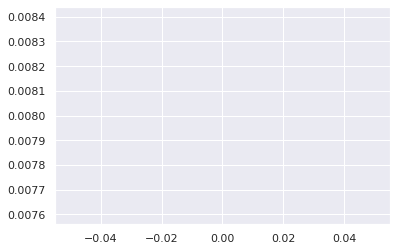

In [64]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.array(trade_loop_back.profit_array).cumsum())